# Rating Curve Example  
## References  
- https://github.com/thodson-usgs/ratingcurve  
- https://www.mdpi.com/2306-5338/11/2/14  

## Installation (from GitHub)  
```
pip install --force-reinstall -v "scipy==1.10"  
```
*Note that SciPy is currently (2025) at version 1.13, but has an incompatability.  The most recent version with which I had success was 1.10.*  
```
pip install scipy  
```
```
pip install pymc
```
```  
pip install ratingcurve
```  

In [1]:
from ratingcurve.ratings import PowerLawRating
from ratingcurve import data

## Built-in Example  
**Data:** Includes several dates with stage, flow (Q), and the standard error of the flow data.  According to the associated article, the standard error is optional.

In [14]:
# load tutorial data
df = data.load('green channel')
df.head()

,datetime,stage,q,q_sigma
0,2020-05-21 14:13:41 [UTC-07:00],7.04,12199.342,199.172931
1,2020-04-16 14:55:31 [UTC-07:00],4.43,4921.953,95.425619
2,2020-03-04 13:54:10 [UTC-07:00],2.99,2331.665,61.860500
3,2020-03-04 13:16:51 [UTC-07:00],2.94,2289.220,47.886745
4,2020-01-23 11:04:32 [UTC-07:00],2.96,2408.210,99.522964


In [2]:
# initialize the model
powerrating = PowerLawRating(segments=2)

Convergence achieved at 78900
Interrupted at 78,899 [39%]: Average Loss = 152.9
Sampling: [a, b, hs_, model_q, sigma]
Sampling: [model_q]


Sampling: [model_q]


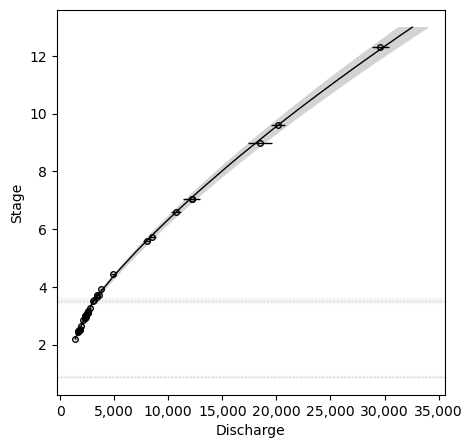

In [16]:
# fit the model
trace = powerrating.fit(q=df['q'],
                        h=df['stage'], 
                        q_sigma=df['q_sigma'])
powerrating.plot()

## Class Example  
Here, we will take the data from Little Pine Creek and use the algorithm to determine the rating curve.  We will then compare this to the rating curve provided by the USGS.

In [3]:
import pandas as pd

df = pd.read_csv('05a_sept2024.csv')
df.head()

,dt,gage,Q,hy,LOGgage,logQ
0,2024-09-01T00:00:00Z,0.920496,2.75913,2024,-0.035978,0.440772
1,2024-09-01T00:15:00Z,0.957072,4.33843,2024,-0.019055,0.637333
2,2024-09-01T00:30:00Z,0.954024,4.18979,2024,-0.020441,0.622192
3,2024-09-01T00:45:00Z,0.935736,3.37227,2024,-0.028847,0.527922
4,2024-09-01T01:00:00Z,0.929640,3.13073,2024,-0.031685,0.495646


Convergence achieved at 47500
Interrupted at 47,499 [23%]: Average Loss = 34,281
Sampling: [a, b, hs_, model_q, sigma]
Sampling: [model_q]


Sampling: [model_q]


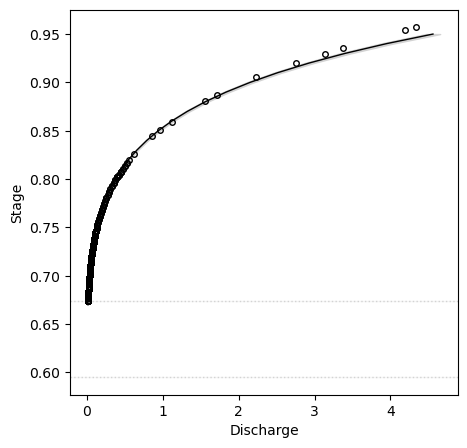

In [4]:
# initialize the model
powerrating = PowerLawRating(segments=2)

# run the model
trace = powerrating.fit(q=df['Q'],
                        h=df['gage'])
powerrating.plot()

In [5]:
# To display, and save the rating curve:
rc = powerrating.table()
rc.to_csv("05a_rating_py.csv")

Sampling: [model_q]
